MOVIE GENRE CLASSIFICATION

TEAM MEMBERS:

D SURYA VAMSI - CB.EN.U4CSE20019
KAKI SRI SATVIKA - CB.EN.U4CSE20029
P MEENAKSHI - CB.EN.U4CSE20039
M PRANAV - CB.EN.U4CSE20050
YADAVA KRISHNAA - CB.EN.U4CSE20072

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


EXPLORATORY DATA ANALYSIS

In [ ]:
df = pd.read_csv('kaggle_movie_train.csv')
df.columns
df.shape
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [ ]:
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [ ]:
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 
                'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [ ]:
genre_reverser = {y : x for x,y in genre_mapper.items()}
genre_reverser

{0: 'other',
 1: 'action',
 2: 'adventure',
 3: 'comedy',
 4: 'drama',
 5: 'horror',
 6: 'romance',
 7: 'sci-fi',
 8: 'thriller'}

In [ ]:
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [ ]:
df.isnull().sum()

id       0
text     0
genre    0
dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


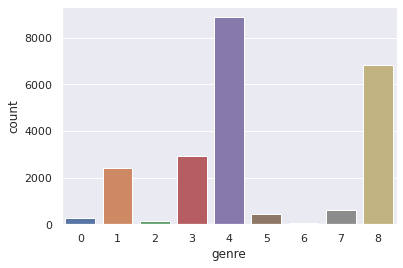

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
sns.set(style ="darkgrid")
sns.countplot(df['genre'])

FEATURE EXTRACTION AND TRANSFORMATION

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):
    dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i]) # Cleaning special character from the dialog/script
    dialog = dialog.lower() # Converting the entire dialog/script into lower case
    words = dialog.split() # Tokenizing the dialog/script by words
    dialog_words = [word for word in words if word not in set(stopwords.words('english'))] # Removing the stop words
    words = [ps.stem(word) for word in dialog_words] # Stemming the words
    dialog = ' '.join(words) # Joining the stemmed words
    corpus.append(dialog) # Creating a corpus

In [ ]:
drama_words = []
for i in list(df[df['genre']==4].index):
    drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
    action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
    comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
    drama += drama_words[i]
    action += action_words[i]
    comedy += comedy_words[i]

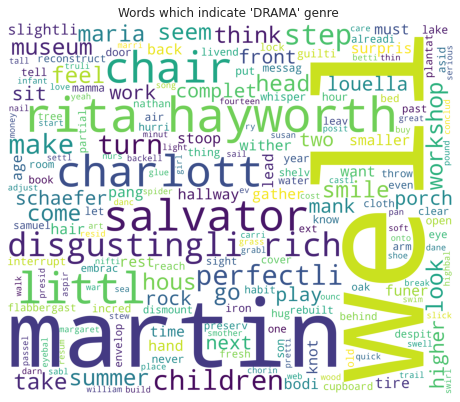

In [ ]:
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

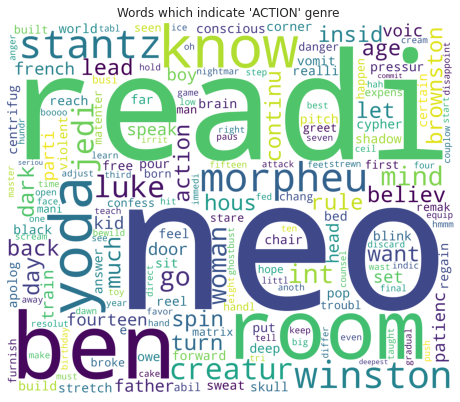

In [ ]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

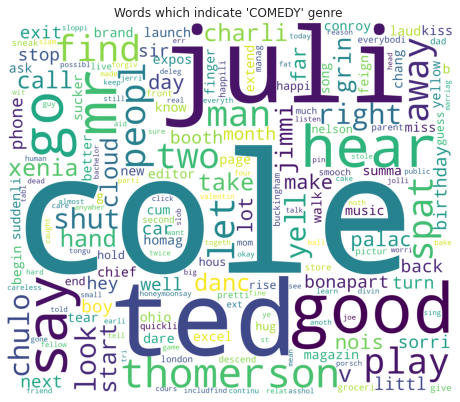

In [ ]:
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [ ]:
# add word count column

df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()

,text,word_count
0,"eady dead, maybe even wishing he was. INT. 2ND...",186
1,"t, summa cum laude and all. And I'm about to l...",180
2,"up Come, I have a surprise.... She takes him ...",188
3,ded by the two detectives. INT. JEFF'S APARTME...,166
4,"nd dismounts, just as the other children reach...",170


DATA VISUALIZATION

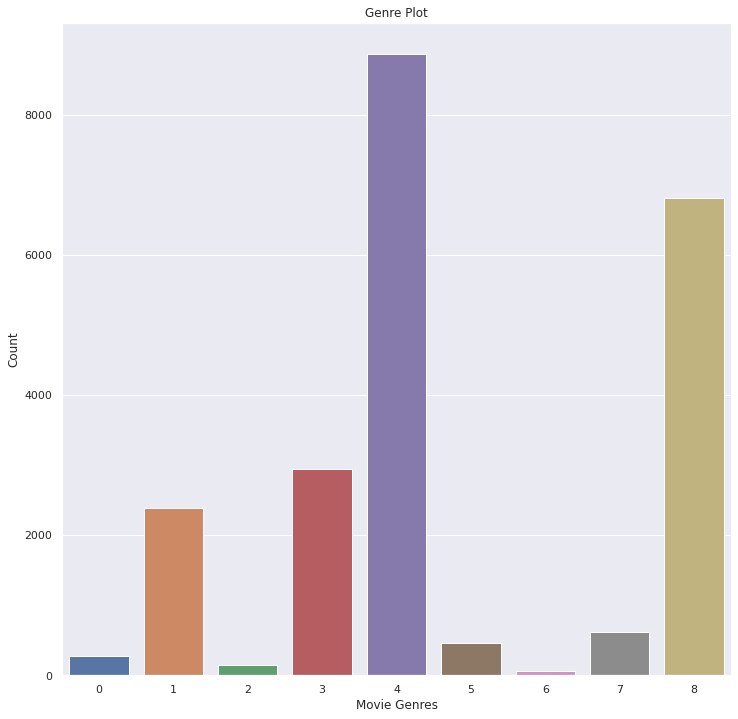

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


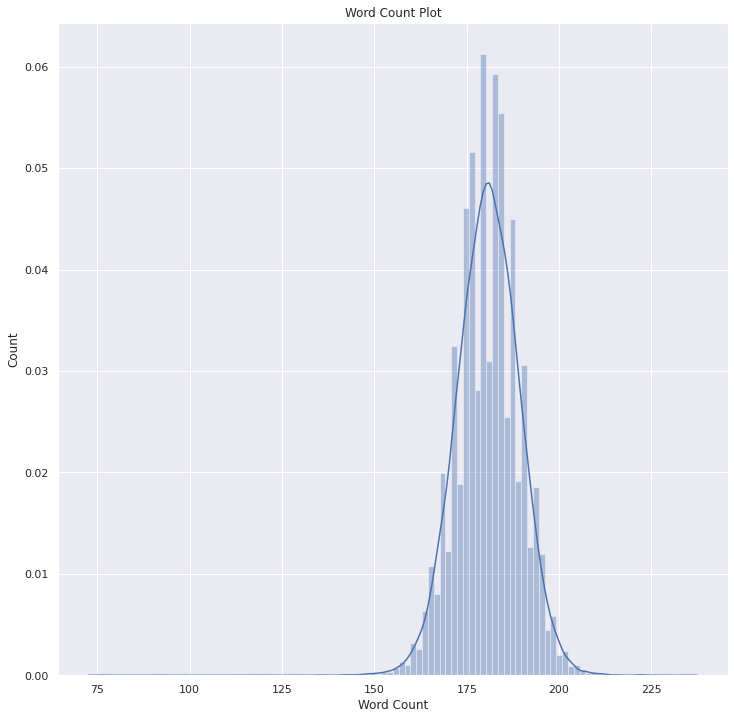

In [ ]:
#histogram

plt.figure(figsize=(12,12))
sns.distplot(df['word_count'], bins=100)
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.title('Word Count Plot')
plt.show()


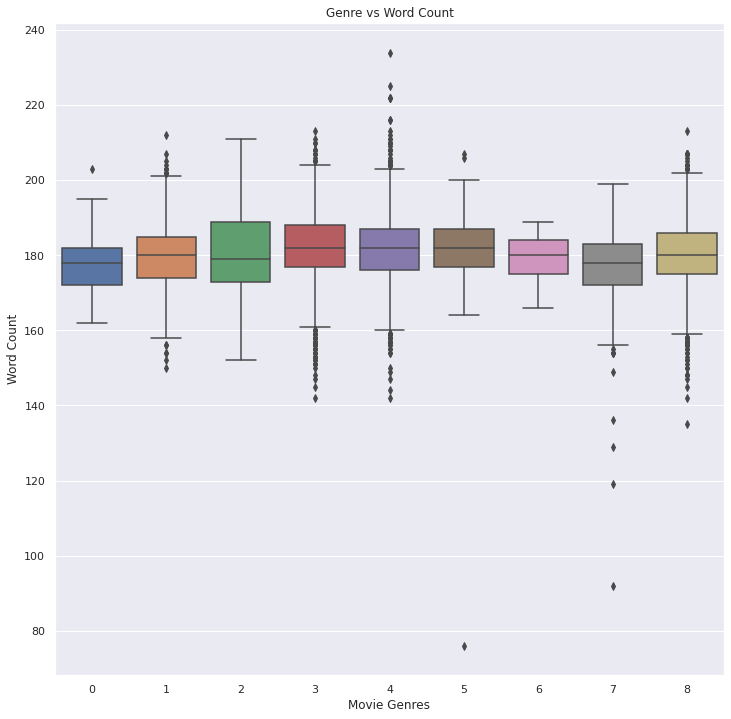

In [ ]:
# box plot

plt.figure(figsize=(12,12))
sns.boxplot(x='genre', y='word_count', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Word Count')
plt.title('Genre vs Word Count')
plt.show()

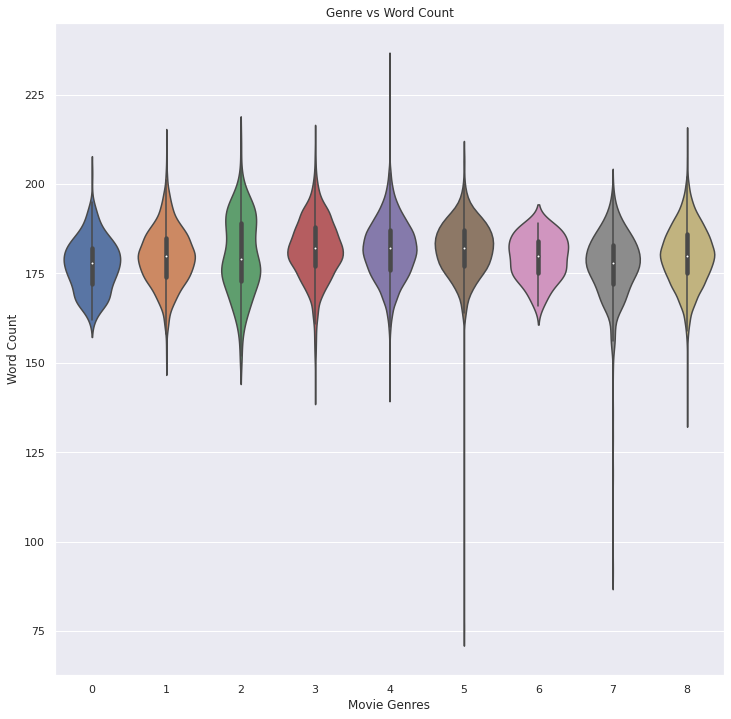

In [ ]:
# violin plot

plt.figure(figsize=(12,12))
sns.violinplot(x='genre', y='word_count', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Word Count')
plt.title('Genre vs Word Count')
plt.show()

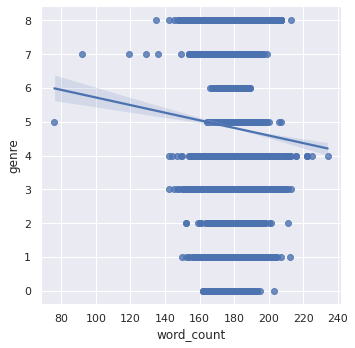

In [ ]:
# regression plot
sns.lmplot(x='word_count', y='genre', data=df)
plt.show()

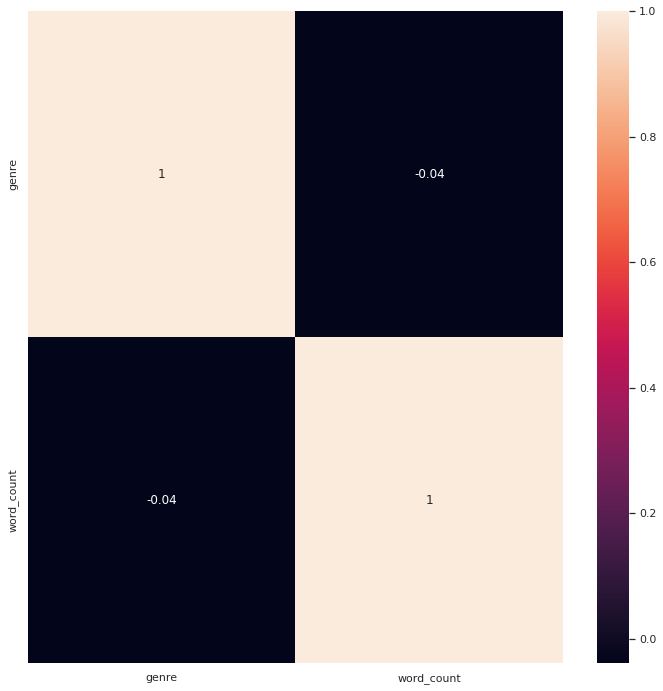

In [ ]:
# heatmap

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

MODEL BUILDING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()
y = df['genre'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

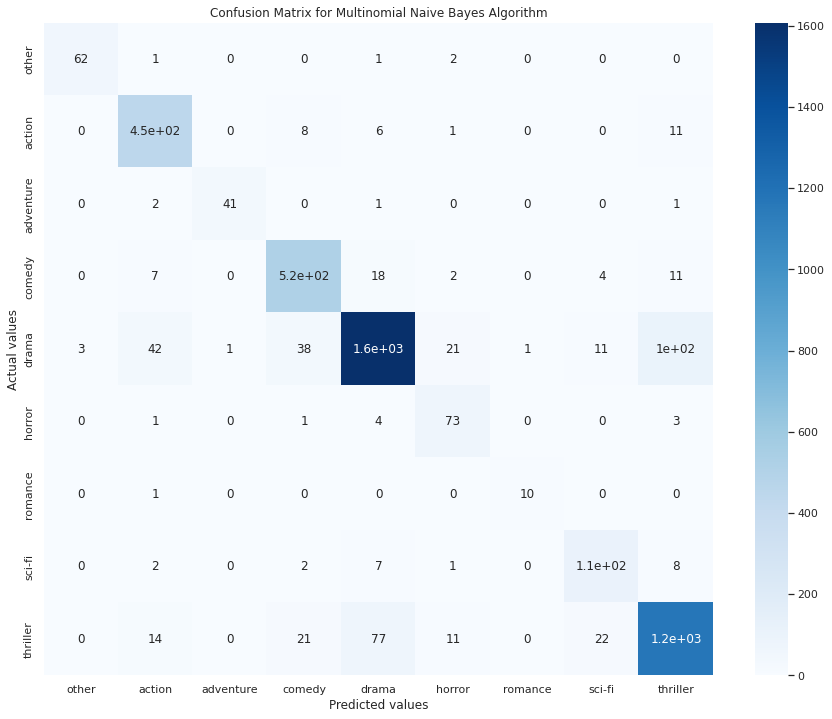

In [ ]:
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
def genre_prediction(sample_script):
    sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
    sample_script = sample_script.lower()
    sample_script_words = sample_script.split()
    sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_script = [ps.stem(word) for word in sample_script_words]
    final_script = ' '.join(final_script)
    temp = cv.transform([final_script]).toarray()
    return nb_classifier.predict(temp)[0]

In [ ]:
test = pd.read_csv('kaggle_movie_test.csv')
test.columns
test.drop('id', axis=1, inplace=True)

In [ ]:
test.head()

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."


In [ ]:
df['text'][1]

"t, summa cum laude and all. And I'm about to launch a brand new magazine called EXPOSED! An homage to Miss Julie Conroy of Xenia, Ohio. Julie grins. JULIE I know where you can find an excellent editor in chief. TED Yellow pages? JULIE Let your fingers do the walking. Suddenly the music changes. People. Ted grins. TED They're playing our song. extending his hand Dare I ask for this dance? JULIE taking his hand You better. Ted and Julie begin dancing and kissing in the b.g. Charlie and Jimmy feign tears. CHARLIE I'm a sucker for a happy ending. hugging Jimmy Hold me. And we start to RISE AGAIN, above the NELSON HOUSE, into the clouds above Xenia... TED V.O. So, as you can guess, everybody pretty much lived happily ever after. My parents didn't give up the grocery store... We descend through clouds and quickly find we're... EXT. LONDON BUCKINGHAM PALACE DAY Mom and Dad take pictures and smooch in front of the palace. TED V.O. ...but they did manage to sneak away for a second honeymoon. O

In [ ]:
sample_script = "t, summa cum laude and all. And I'm about to launch a brand new magazine called EXPOSED! An homage to Miss Julie Conroy of Xenia, Ohio. Julie grins. JULIE I know where you can find an excellent editor in chief. TED Yellow pages? JULIE Let your fingers do the walking. Suddenly the music changes. People. Ted grins. TED They're playing our song. extending his hand Dare I ask for this dance? JULIE taking his hand You better. Ted and Julie begin dancing and kissing in the b.g. Charlie and Jimmy feign tears. CHARLIE I'm a sucker for a happy ending. hugging Jimmy Hold me. And we start to RISE AGAIN, above the NELSON HOUSE, into the clouds above Xenia... TED V.O. So, as you can guess, everybody pretty much lived happily ever after. My parents didn't give up the grocery store... We descend through clouds and quickly find we're... EXT. LONDON BUCKINGHAM PALACE DAY Mom and Dad take pictures and smooch in front of the palace. TED V.O. ...but they did manage to sneak away for a second honeymoon. ON"
print(f"Original Genre: {df.loc[df['text'] == sample_script]['genre'].tolist()}")

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))


Original Genre: [3]
Script: t, summa cum laude and all. And I'm about to launch a brand new magazine called EXPOSED! An homage to Miss Julie Conroy of Xenia, Ohio. Julie grins. JULIE I know where you can find an excellent editor in chief. TED Yellow pages? JULIE Let your fingers do the walking. Suddenly the music changes. People. Ted grins. TED They're playing our song. extending his hand Dare I ask for this dance? JULIE taking his hand You better. Ted and Julie begin dancing and kissing in the b.g. Charlie and Jimmy feign tears. CHARLIE I'm a sucker for a happy ending. hugging Jimmy Hold me. And we start to RISE AGAIN, above the NELSON HOUSE, into the clouds above Xenia... TED V.O. So, as you can guess, everybody pretty much lived happily ever after. My parents didn't give up the grocery store... We descend through clouds and quickly find we're... EXT. LONDON BUCKINGHAM PALACE DAY Mom and Dad take pictures and smooch in front of the palace. TED V.O. ...but they did manage to sneak awa

In [ ]:
sample_script = input()
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

gravity is the force of attraction
Prediction: thriller


KNN IMPLEMENTATION

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.8845392665951173

DECISION TREE IMPLEMENTATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import tree
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6923531148509005


SVM IMPLEMENTATION

In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [ ]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.850


RANDOM FOREST IMPLEMENTATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state = 42,n_jobs=-1, max_depth=5)

In [ ]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
classifier_rf.score(X_test,y_test)

0.3967480703530305

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    0,    0,    0,  191,    0,    0,    0,    0],
       [   0,    3,    0,    0, 1642,    0,    0,    0,    0],
       [   0,    0,    0,    0,  104,    0,    0,    0,    0],
       [   0,    0,    0,    0, 2096,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6198,    0,    0,    0,    0],
       [   0,    0,    0,    0,  301,    0,    0,    0,    0],
       [   0,    0,    0,    0,   40,    0,    0,    0,    0],
       [   0,    0,    0,    0,  428,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4733,    0,    0,    0,   70]])

Text(66.5, 0.5, 'Truth')

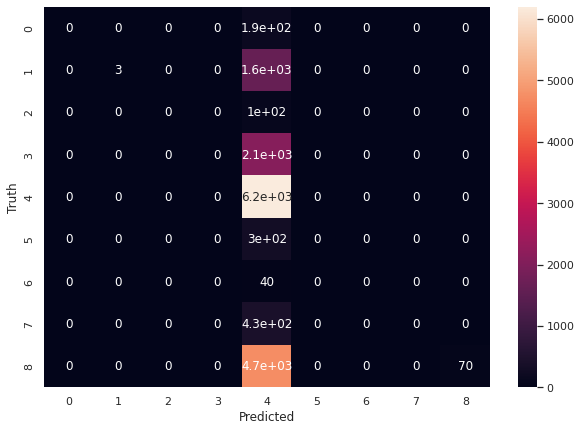

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       1.00      0.00      0.00      1645
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00      2096
           4       0.39      1.00      0.57      6198
           5       0.00      0.00      0.00       301
           6       0.00      0.00      0.00        40
           7       0.00      0.00      0.00       428
           8       1.00      0.01      0.03      4803

    accuracy                           0.40     15806
   macro avg       0.27      0.11      0.07     15806
weighted avg       0.56      0.40      0.23     15806



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


PERCEPTRON IMPLEMENTATION

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
 
y_pred = ppn.predict(X_test_std)
 
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

NameError: ignored

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pickle

# Save the model using pickle
filename = 'svc.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
import pickle

# Save the model using pickle
filename = 'ppn.pkl'
pickle.dump(ppn, open(filename, 'wb'))

In [ ]:
import pickle

# Save the model using pickle
filename = 'classifier_rf.pkl'
pickle.dump(classifier_rf, open(filename, 'wb'))

In [ ]:
import pickle

# Save the model using pickle
filename = 'clf.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import pickle

# Save the model using pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
import pickle

#load the model file from the path
model_file = open('ppn.pkl', 'rb')

#load the model using pickle
ppn = pickle.load(model_file)

#close the model file
model_file.close()

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.3-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-linux_x86_64.whl size=3128550 sha256=9689bfbd7d27793fab2e1e6599d22b2ce33c1d88444faf1ffae3cf47c59aa4f9
  Stored in directory: /root/.cache/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


In [ ]:
import fasttext
model = fasttext.train_unsupervised('kaggle_movie_train.csv')
df['vec'] = df["text"].apply(lambda x: model.get_sentence_vector(x))
df

,text,genre,vec,Clusters,x,y,z,transformed
0,"eady dead, maybe even wishing he was. INT. 2ND...",8,"[0.0822338, 0.082091935, -0.002163519, 0.00034...",23,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",0.013763,-0.047080,"[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
1,"t, summa cum laude and all. And I'm about to l...",3,"[0.07090166, 0.106124036, 0.0013478455, -0.032...",1,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.013980,-0.001819,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"up Come, I have a surprise.... She takes him ...",4,"[0.087847546, 0.11406479, -0.018728226, -0.029...",15,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.089526,-0.001887,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ded by the two detectives. INT. JEFF'S APARTME...,8,"[0.04507708, 0.058509566, -0.050437305, -0.025...",40,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.024459,-0.048500,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"nd dismounts, just as the other children reach...",4,"[0.06337792, 0.09441865, -0.048872683, -0.0015...",44,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.047075,-0.012111,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,4,"[0.08750603, 0.096109584, 0.041136857, -0.0414...",19,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.015348,0.015427,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22575,shards. BOJO LAZ! Laz pushes Deke back through...,4,"[0.06826561, 0.08887156, -0.00030311276, -0.01...",46,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.020503,-0.066123,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22576,"OTTIE You've got a thing about Ernie's, haven'...",8,"[0.07965002, 0.10360847, -0.006722126, -0.0304...",15,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.055744,-0.054738,"[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
22577,....with marked skill and dexterity . LANA wry...,1,"[0.070929036, 0.10559874, -0.008590695, -0.037...",15,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.022344,0.004355,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
model.get_nearest_neighbors("thriller")

[(0.9706571698188782, ',thriller'),
 (0.9552717208862305, 'm",thriller'),
 (0.9549880623817444, 'g",thriller'),
 (0.9549110531806946, 'n",thriller'),
 (0.954875111579895, 'An",thriller'),
 (0.9547935724258423, 'k",thriller'),
 (0.9540915489196777, 'su",thriller'),
 (0.9540452361106873, 'tha",thriller'),
 (0.9539217948913574, 'd",thriller'),
 (0.953605055809021, 'Y",thriller')]

In [ ]:
model.get_word_vector("murder")

array([ 0.2618603 ,  0.6715647 , -0.31639707,  0.09009654,  0.27526906,
        0.35702142,  0.32855186,  0.11460405, -0.32956338, -0.05461007,
        0.23922263,  0.24358052, -0.08663081,  0.14631562, -0.30622277,
        0.54573107, -0.2538492 , -0.00403201,  0.08097111,  0.04847407,
        0.26769456,  0.5750678 ,  0.57526517, -0.06029319, -0.09822663,
       -0.4132881 ,  0.06226896, -0.38369158, -0.39847037, -0.00760503,
       -0.17131457, -0.28863692, -0.08668854,  0.28034282, -0.336264  ,
        0.18566729, -0.7646566 ,  0.21082796, -0.18939409,  0.5226106 ,
       -0.26903453,  0.60823107,  0.5540147 ,  0.47131684, -0.26586744,
       -0.5474515 ,  0.5020495 , -0.07438735,  0.09666611, -0.27488905,
        0.11168043, -0.6977722 ,  0.49627435,  0.11810388,  0.1201703 ,
        0.15843844,  0.3458831 ,  0.02456618, -0.32708696,  0.3619753 ,
        0.18936338, -0.3663017 , -0.38552108, -0.78185767, -0.34982064,
        0.26721433, -0.4005616 ,  0.46963876,  0.40761185,  0.01

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=53)
df['Clusters']=kmeans.fit_predict(df['vec'].values.tolist())
df

,text,genre,vec,Clusters
0,"eady dead, maybe even wishing he was. INT. 2ND...",8,"[0.11278738, 0.010648315, 0.0018101041, 0.0019...",23
1,"t, summa cum laude and all. And I'm about to l...",3,"[0.10295476, -0.008488155, 0.022297135, 0.0010...",1
2,"up Come, I have a surprise.... She takes him ...",4,"[0.10676561, 0.0104558, 0.0015656379, -0.00036...",15
3,ded by the two detectives. INT. JEFF'S APARTME...,8,"[0.13046232, 0.011896891, -0.0057761697, 0.019...",40
4,"nd dismounts, just as the other children reach...",4,"[0.12933433, 0.011506951, -0.004064663, -0.001...",44
...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,4,"[0.09280674, -0.020998906, 0.029553855, 0.0314...",19
22575,shards. BOJO LAZ! Laz pushes Deke back through...,4,"[0.11267813, 0.011727544, -0.008191975, 0.0081...",46
22576,"OTTIE You've got a thing about Ernie's, haven'...",8,"[0.10289029, -0.01216007, 0.031759504, 0.00796...",15
22577,....with marked skill and dexterity . LANA wry...,1,"[0.09310438, -0.009656367, 0.027444867, 0.0148...",15


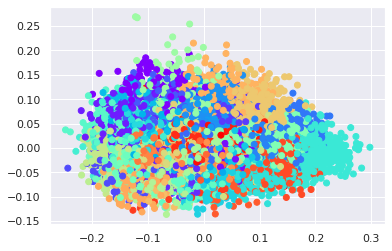

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
df['x']=pca.fit_transform(df['vec'].values.tolist())[:,0]
df['y']=pca.fit_transform(df['vec'].values.tolist())[:,1]
df['z']=pca.fit_transform(df['vec'].values.tolist())[:,2]
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['x'],df['z'],c=df['Clusters'],cmap='rainbow')

Text(0.5, 0.92, 'Tweet Clustering using K Means')

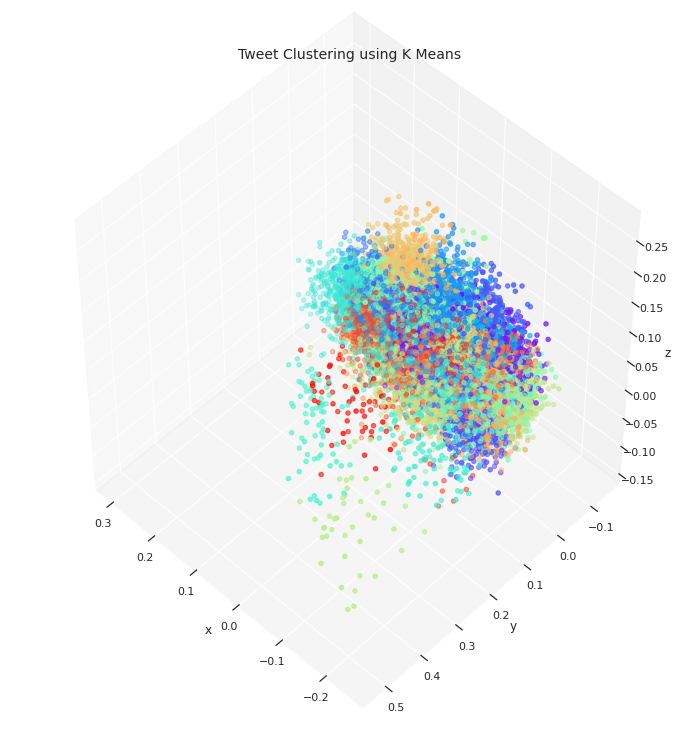

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df['x'],df['y'],df['z'], c=df['Clusters'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Tweet Clustering using K Means", fontsize=14)

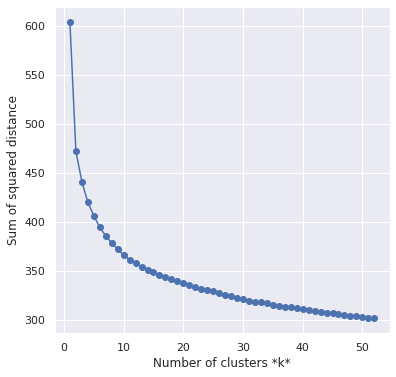

In [ ]:
# Run the Kmeans algorithm and get the index of data points clusters
from sklearn.preprocessing import StandardScaler
# dfstd= StandardScaler().fit_transform(df["vec"])

sse = []
list_k = list(range(1, 53))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit_predict(df['vec'].values.tolist())
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
Acluster = AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage="ward")
Acluster.fit(X_train)
Acluster_y_preds = Acluster.fit_predict(X_test)
Acluster_preds = pd.DataFrame({"Predicted":Acluster_y_preds,"Actual":y_test})
Acluster_preds

,Predicted,Actual
0,0,1
1,0,4
2,0,1
3,0,8
4,0,8
...,...,...
4511,0,4
4512,0,8
4513,0,8
4514,0,4


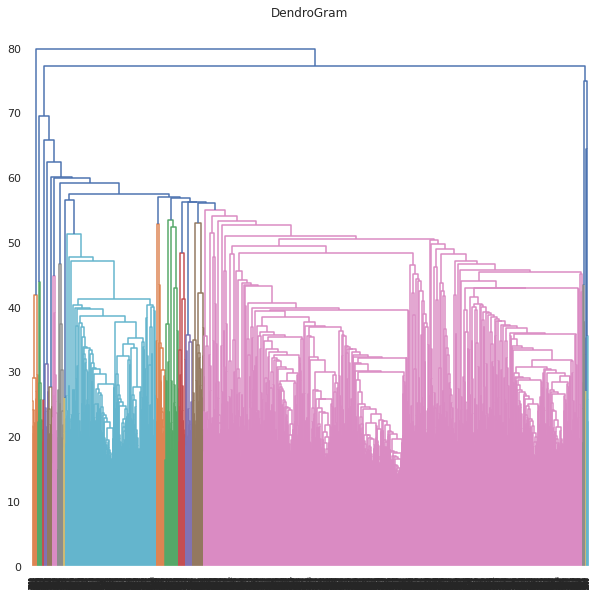

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(X_test,method="ward"))